## COGS 108: Cinema-Income Correlation in the United States

Group members:

Manuel Cortez (A13346837),
Qiyue Wang (A14647465),
Jose Salinda (A13210469),
Albert Peralta (A13420411),
Shannon Chu (A13956295)

# Introduction and Background

### Research Question
The aim of our project is finding trends in ratings and box office earnings of movies and movie genres and their relationship to the economic state of the United States. We want to know if there are correlations between a good or bad economic year and ratings for movies released as well as ratings for movie genres during that year.

### Overview
We chose to limit our study to the United States because we could access information from the United States Census Bureau such as median household income and GDP. 

We also found a dataset containing movie-data from 1984 to 2015 so that our study encompasses a variety of economic fluctuation such as the period of Reaganomics and the 2008 recession that will allow us to not only find a distinction between movies watched during outstanding economic times and economic struggles but also distinguish genres, revenue values, and ratings of movies.

TODO Manny/Albert correlations what do?

### Hypothesis
When the economy is not doing well or when there is lower income per capita, we predict that box office/ratings for movies, in general, will be higher. In addition, when in years where incomes are relatively low compared to other years, moviegoers will gravitate toward specific genres of movies. On the other hand, when the economy is doing well, moviegoers will prefer other genres of movies.

### Background, Prior Work, and Review of Project Proposal
With every new movie, there is a flurry of data and reviews both good and bad, but rarely are the movies or their reviews juxtaposed with the overall economic status (and resulting sentiment) of the viewers after their release. In our study, we are looking to how ratings and box office incomes are influenced by outside factors.

Since 1984, the domestic economy in the United States has experienced many ups and downs. We want to know if people who watch movies in theaters when the economy is not doing well are looking for an escape from their daily lives. If people who watch movies when the economy is poor are looking for an escape, do they give movies better ratings than in other years? 

We also want to know if there is a correlation with box office values with median household incomes. We researched this by analyzing if box office values are negatively correlated with median household incomes.

In our initial proposal, we did not specify a specific set of genres we wanted to research whether or not movie watchers prefer specific genres of movies. Instead, we are relying on the dataset to find genres that have the highest correlation with good and bad economic years. This is to prevent our study from being affected by confirmation bias.

One study from Forbes analyzed how advertising affects revenue. Advertising for films involves a trade-off where too much spending on advertisements reaches a point of diminishing returns. There is a possibility that hard economic times by themselves are a kind of advertisement by tempting movie watchers to escape from the hardships of their daily lives. In this case, films would not need very large advertising budgets, which would increase box office revenues.

Source: https://www.forbes.com/sites/forbesinsights/2015/07/01/8-insights-on-how-marketing-drives-movie-box-office-sales/#156118c88ce3

Another study looks at many factors that affect a film's success such as competition, critical reception, awards, and franchise and actor favorability. The factors most relevant to our study are competition and critical reception. For example, the economy determines how many movies will be produced, which can lead to better movie reviews when there are fewer movies. On the opposite end of the spectrum, more movies means more competition, and movies that might have performed well with less competition are overshadowed. In addition, critical reception can either attract more movie watchers or severely reduce interest in spending money on a new film.

For example, take Disney's 2002 animation "Treasure Planet." The movie itself received great reviews but unfortunately flopped in the box office due to poor timing (the movie released right after "Lilo & Stitch"). Movie critic Jim Hill blamed the box office failure on consumers preferring to buy the film in DVD rather than spend money on both movie tickets and the DVD. "Treasure Planet" also failed in its advertising campaign. Its advertisements did not target a specific demographic and was very underfunded by executives who saw the film as a waste of time and money. However, critical reception has helped "Treasure Planet" to become a success after the box office; while box office revenues were very low, positive reviews and consumers looking to save on movie tickets paved the film's road to success in DVD sales.

Source: https://filmmarketing101.com/2018/11/23/what-factors-influence-a-films-box-office-success/

Source: https://topdocumentaryfilms.com/treasure-planet-disney-biggest-mistake/

Source: https://jimhillmedia.com/editor_in_chief1/b/jim_hill/archive/2003/01/07/227.aspx

***

# Dataset Descriptions

#### Dataset: GDP

Dataset Description: This dataset contains data about the United States' GDP from 1947 to 2015. There are 276 unique observations before cleaning because data about the United States' GDP was collected quarterly. The provided variables are the dates the data was collected and GDP in billions of dollars. The GDP values are not adjusted for inflation.

Link to dataset: https://query.data.world/s/gw6ftdnaltg55ldak7f5y45bj4hytx

#### Dataset: Household Median Income

Dataset Description: This excel file holds median household income in each state in the United States from 1987 to 2017. The values are adjusted for both 2017 and 2018 USD.

Link to dataset: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

#### Dataset: Movie Database

Dataset Description: This csv file contains data for more than 5000 movies. Each film entry has 27 attributes including gross, budget, directors, and much more
    
Link to dataset: https://query.data.world/s/h4ksbq4lniukcgbvh25o5m2akczf3v

***

# Data Analysis - Cleaning & Pre-processing

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#import cpi library to adjust GDP for inflation
import sys
!python -m pip install cpi --user
import cpi as cpi

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [2]:
# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

## GDP

In [5]:
GDP_df = pd.read_excel('GDP-2.xls')

When we first look at GDP_df, we can see that there are many rows of cells containing NaN; those cells either contain notes or have been left blank by whoever created the dataset. Rows 0-8 contain a list of details about this dataset. Row 18 contains data column titles, and row 19 and onward contain dates formatted year-month-day and values in billions of US dollars. This dataset is a record of gross domestic product measured quarterly. See rows 0-8 in GDP_details_df below.

In [6]:
GDP_details_df = GDP_df.iloc[0:8,:]
GDP_details_df

,Title:,Gross Domestic Product
0,Series ID:,GDP
1,Source:,US. Bureau of Economic Analysis
2,Release:,Gross Domestic Product
3,Seasonal Adjustment:,Seasonally Adjusted Annual Rate
4,Frequency:,Quarterly
5,Units:,Billions of Dollars
6,Date Range:,1947-01-01 to 2016-01-01
7,Last Updated:,2016-05-27 7:56 AM CDT


Now isolated useful data, renumbered the indices, and added titles to the columns of data. We added titles to indicate the full date on which the data was collected and GDP in billions of US dollars.

In [7]:
GDP_df = GDP_df.iloc[19:295,:]
GDP_df.columns = ['DATE', 'GDP (in billions)']
GDP_df.index = range(276)

We also extracted the years from the 'DATE' column and placed the years in a new column 'YEARS', and then isolated only 'YEAR' and 'GDP' columns from GDP_df so we can sum quarterly measurements of GDP so we have annual measurements of GDP using groupby().

In [8]:
#extracting years from date column
GDP_df['YEAR'] = GDP_df['DATE'].dt.year
GDP_df = GDP_df[['DATE','YEAR','GDP (in billions)']]
#drop the 'DATE' column
GDP_df = GDP_df.drop('DATE',1)
#sum quarterly measurements of GDP so we get annual measurements of GDP
GDP_df = GDP_df.groupby(['YEAR']).sum()

Another major problem with GDP_df is that the GDP measurements have not been adjusted for inflation. We do so using the cpi library imported earlier.

In [9]:
#i = year
#GDP_df.at[i,'GDP'] is dollars

for i in GDP_df.index:    
    GDP_df.at[i,'GDP_adjusted (in billions)'] = cpi.inflate(GDP_df.at[i,'GDP (in billions)'], i, to = 2018)

In addition, due to restrictions of other datasets we are using, we are only interested in the years 1984 to 2015. We reduced GDP_df to match. We also exported a copy of GDP_df as a CSV file.

In [10]:
#trim GDP_df
GDP_df = GDP_df.loc[1984:2015,:]
#export GDP_df
cleaned_GDP_csv = GDP_df.to_csv (r'clean_GDP.csv')

#preview
GDP_df

,GDP (in billions),GDP_adjusted (in billions)
YEAR,,
1984,16162.8,39062.485270
1985,17387.0,40576.184099
1986,18360.5,42066.150306
1987,19480.9,43061.534827
1988,21010.5,44597.494704
...,...,...
2011,62071.7,69292.734350
2012,64621.0,70675.999578
2013,66652.6,71845.595660


## Median U.S. Household Income (1984-2017)

In [13]:
#Import csv
income = pd.read_csv('h08.csv')

In [14]:
#Get shape of initial dataset
income.shape

(114, 71)

In [15]:
#Preview the dataset
income

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,Table H-8. Median Household Income by State: ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,(Households as of March of the following year....,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,CURRENT DOLLARS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,State,2017,NaN,2016,NaN,...,NaN,1985 (20),NaN,1984 (19),NaN
4,NaN,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,...,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror
...,...,...,...,...,...,...,...,...,...,...,...
109,West Virginia,"45,392","1,485","45,308","2,037",...,"1,938","34,821","1,804","37,955","1,370"
110,Wisconsin,"63,451","3,673","61,103","1,885",...,"1,719","50,645","2,529","46,743","1,850"
111,Wyoming,"57,837","3,134","59,073","3,189",...,"1,848","48,106","2,285","53,668","1,647"
112,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


Upon initial observation, we can see that there is clearly a large amount of data that we don't need but we can spot out the data that is useful to us when looking at the raw, unwrangled data. We can see that the relevant information starts at row 5 and we see that we can gather the household incomes at every odd column.

In [16]:
#Extract relevant data onto a dataframe
medianIncome = income.iloc[ :,[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69] ][5:57]

In [17]:
#Preview extracted data
medianIncome

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,...,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69
5,"61,372","59,039","56,516","53,657","53,585",...,"27,225","26,061","24,897","23,618","22,415"
6,"51,113","47,221","44,509","42,278","47,320",...,"19,948","19,734","19,132","18,333","17,310"
7,"72,231","75,723","75,112","67,629","72,472",...,"33,103","33,233","31,356","34,782","32,356"
8,"61,125","57,100","52,248","49,254","52,611",...,"26,435","26,749","25,500","23,877","21,425"
9,"48,829","45,907","42,798","44,922","39,376",...,"20,172","18,827","18,730","17,451","15,674"
...,...,...,...,...,...,...,...,...,...,...,...
52,"71,293","66,451","61,486","66,155","65,907",...,"32,648","29,996","29,715","28,429","26,525"
53,"75,418","70,310","67,243","59,068","63,922",...,"32,327","27,319","26,881","24,000","25,017"
54,"45,392","44,354","42,824","39,552","43,069",...,"19,353","17,207","16,464","15,983","16,843"
55,"63,451","59,817","55,425","58,080","51,726",...,"29,575","26,369","26,430","23,246","20,743"


Now that we have extracted the relevant data, we can begin to make our dataframe look presentable for easier interpretation. We begin by labeling all the extracted columns with their corresponding year.

In [18]:
#Starting at 2017, rename the columns with the year
for i in range(len(medianIncome.columns)):
    medianIncome.rename(columns = {medianIncome.columns[i]: 2017-i}, inplace=True)

In [19]:
#Preview re-named data
medianIncome

,2017,2016,2015,2014,2013,...,1987,1986,1985,1984,1983
5,"61,372","59,039","56,516","53,657","53,585",...,"27,225","26,061","24,897","23,618","22,415"
6,"51,113","47,221","44,509","42,278","47,320",...,"19,948","19,734","19,132","18,333","17,310"
7,"72,231","75,723","75,112","67,629","72,472",...,"33,103","33,233","31,356","34,782","32,356"
8,"61,125","57,100","52,248","49,254","52,611",...,"26,435","26,749","25,500","23,877","21,425"
9,"48,829","45,907","42,798","44,922","39,376",...,"20,172","18,827","18,730","17,451","15,674"
...,...,...,...,...,...,...,...,...,...,...,...
52,"71,293","66,451","61,486","66,155","65,907",...,"32,648","29,996","29,715","28,429","26,525"
53,"75,418","70,310","67,243","59,068","63,922",...,"32,327","27,319","26,881","24,000","25,017"
54,"45,392","44,354","42,824","39,552","43,069",...,"19,353","17,207","16,464","15,983","16,843"
55,"63,451","59,817","55,425","58,080","51,726",...,"29,575","26,369","26,430","23,246","20,743"


Wait a minute! There is a column with income from 1983, but we know that our range only goes back to 1984! Upon further observations, we can see that the original dataset has TWO columns for 2013.

In [20]:
income.iloc[3,:][11]

'2013 (38)'

In [21]:
income.iloc[3,:][9]

'2013 (39)'

We choose to drop the first '2013' based on trivial choice so as to not alter the median too significantly.

In [22]:
#Drop one 2013 column
medianIncome.drop(columns=2013,inplace=True)

In [23]:
#Rename the data again, this time with correct number of columns
for i in range(len(medianIncome.columns)):
    medianIncome.rename(columns = {medianIncome.columns[i]: 2017-i}, inplace=True)

Continue to clean up the dataframe by labeling each row with its respective state

In [24]:
#Extract state names from raw data into a dataframe
States = income[['Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61']].copy()
States = States[5:57]

In [25]:
#Rename the columns to a suitable name
States = States.rename(index=str, columns={"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61": "State", "Unnamed: 1":"2017 Median Household Income"} )

In [26]:
#Set the 'State' column as the index column
medianIncome = medianIncome.set_index(States.iloc[:,0])

Here we note that there are 52 rows even though we know that there are currently 50 states in the United States. Upon closer observation, we note that Washington D.C. and the overall United States have been given rows. Since we only want to look at states, we chose to drop D.C. and U.S. but keep the U.S. row as the average household median of each year. 

In [27]:
#Save US median to another dataframe
USMedian = medianIncome.loc[['United States']]

In [28]:
#Drop U.S. and D.C.
medianIncome.drop({'United States', 'D.C.'}, axis=0, inplace=True)

In [29]:
#Preview cleaned dataframe
medianIncome

,2017,2016,2015,2014,2013,...,1988,1987,1986,1985,1984
State,,,,,,,,,,,
Alabama,"51,113","47,221","44,509","42,278","41,381",...,"19,948","19,734","19,132","18,333","17,310"
Alaska,"72,231","75,723","75,112","67,629","61,137",...,"33,103","33,233","31,356","34,782","32,356"
Arizona,"61,125","57,100","52,248","49,254","50,602",...,"26,435","26,749","25,500","23,877","21,425"
Arkansas,"48,829","45,907","42,798","44,922","39,919",...,"20,172","18,827","18,730","17,451","15,674"
California,"69,759","66,637","63,636","60,487","57,528",...,"30,287","30,146","29,010","26,981","25,287"
...,...,...,...,...,...,...,...,...,...,...,...
Virginia,"71,293","66,451","61,486","66,155","67,620",...,"32,648","29,996","29,715","28,429","26,525"
Washington,"75,418","70,310","67,243","59,068","60,106",...,"32,327","27,319","26,881","24,000","25,017"
West Virginia,"45,392","44,354","42,824","39,552","40,241",...,"19,353","17,207","16,464","15,983","16,843"


### Preparing GDP and Median Household Income Data for Merge

In [30]:
medianIncome = medianIncome.T
medianIncome = medianIncome.loc[2015:1984,:]
medianIncome = medianIncome.reindex(index=medianIncome.index[::-1])

In [31]:
USMedian = USMedian.T
USMedian = USMedian.loc[2015:1984]
USMedian = USMedian.reindex(index=USMedian.index[::-1])

## IMDB (1916-2016)

In [14]:
mmdf = pd.read_csv('movie_metadata.csv')
mmdf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,...,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,...,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,...,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,...,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,...,NaN,12.0,7.1,NaN,0


When we looked at this dataset, we found that there are several variables that serve no purpose to our measurements. We deleted the columns (variables) we were not going to use to answer our research question.

In [15]:
mmdf = mmdf.drop(columns = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'language', 'budget','director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'movie_imdb_link', 'num_voted_users', 'num_critic_for_reviews', 'color','movie_facebook_likes','plot_keywords','aspect_ratio', 'num_user_for_reviews'], axis = 1)
mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009.0,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007.0,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015.0,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012.0,8.5
4,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,7.1


As can be seen above, there is missing data in our data frame. Before deleting the empty rows, we checked our entire dataframe for missing data and decided that we can delete the rows with empty entries because it was not a lot and we will still be able to answer our question.

In [16]:
mmdf=mmdf.dropna(how = 'any')

When previewing each column, we found that genre, country, content_rating, and title_year needed some work. We started by cleaning out the content_rating column. This column has 18 different ratings; some of those ratings were less known of and only included a few amount of movies from our dataframe. We removed all rows from our dataframe that consisted of ratings we believe are not useful in our analysis. The content ratings that remained are: R, PG-13, PG, Not Rated, and G. 

In [17]:
mmdf = mmdf[mmdf.content_rating != 'TV-14']
mmdf = mmdf[mmdf.content_rating != 'TV-Y']
mmdf = mmdf[mmdf.content_rating != 'TV-Y7']
mmdf = mmdf[mmdf.content_rating != 'M']
mmdf = mmdf[mmdf.content_rating != 'GP']
mmdf = mmdf[mmdf.content_rating != 'NC-17']
mmdf = mmdf[mmdf.content_rating != 'Passed']
mmdf = mmdf[mmdf.content_rating != 'TV-PG']
mmdf = mmdf[mmdf.content_rating != 'TV-MA']
mmdf = mmdf[mmdf.content_rating != 'X']
mmdf = mmdf[mmdf.content_rating != 'TV-G']
mmdf = mmdf[mmdf.content_rating != 'X']
mmdf = mmdf[mmdf.content_rating != 'Unrated']
mmdf = mmdf[mmdf.content_rating != 'Approved']
mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009.0,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007.0,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015.0,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012.0,8.5
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,USA,PG-13,2012.0,6.6


Next, the title_year column. In our GDP and Median US Household income data set we had data starting from 1984. This imdb data set has data from years prior to 1984. We got rid of the movies released before 1984 so that this will enable us to make comparisons between the two data sets. In addition, the values in 'title_year' are floats and we changed them to be integers becuase all the values in title_year are whole numbers.

In [18]:
mmdf = mmdf[mmdf.title_year >= 1984]
mmdf['title_year']=mmdf['title_year'].astype(int)
mmdf

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012,8.5
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,USA,PG-13,2012,6.6
...,...,...,...,...,...,...,...,...
5034,80.0,70071.0,Thriller,Cavite,Philippines,Not Rated,2005,6.3
5035,81.0,2040920.0,Action|Crime|Drama|Romance|Thriller,El Mariachi,USA,R,1992,6.9
5037,95.0,4584.0,Comedy|Drama,Newlyweds,USA,Not Rated,2011,6.4
5041,100.0,10443.0,Comedy|Drama|Romance,Shanghai Calling,USA,PG-13,2012,6.3


Our research question involves measuring how movies perform during changes in the United States economy. We noticed that our data set contains a lot of movies that were not released in the United States. We were worried if the gross values in our data set were in US dollars. We checked the source of our data set and found no information regarding this. We decided to remove all movies whose country column is not listed as 'USA' because those are movies whose gross value is in dollars. In the process of doing this, we lost a lot of movies that did air in the USA, but were not filmed in the USA. We thought that this will affect our ability to answer our research question, but still we have over 3000 observations.


In [19]:
mmdf=mmdf[mmdf.country =='USA']
mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007,7.1
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012,8.5
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,USA,PG-13,2012,6.6
6,156.0,336530303.0,Action|Adventure|Romance,Spider-Man 3,USA,PG-13,2007,6.2


We can now drop the country column since it already includes all the observations we are intersested.

In [20]:
mmdf=mmdf.drop(columns = ['country'])


To make the data easier to read for the reader, we decided to set 'movie_title' as our index. In addition, we thought that the order the columns were oringally set to be made it streneous to match movies with their respective measuremnents. 

In [21]:
mmdf.set_index('movie_title', inplace = True)
columnsTitles = [ 'genres','content_rating','title_year','duration', 'gross','imdb_score']
mmdf=mmdf[columnsTitles]
mmdf.head()

,genres,content_rating,title_year,duration,gross,imdb_score
movie_title,,,,,,
Avatar,Action|Adventure|Fantasy|Sci-Fi,PG-13,2009,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,PG-13,2007,169.0,309404152.0,7.1
The Dark Knight Rises,Action|Thriller,PG-13,2012,164.0,448130642.0,8.5
John Carter,Action|Adventure|Sci-Fi,PG-13,2012,132.0,73058679.0,6.6
Spider-Man 3,Action|Adventure|Romance,PG-13,2007,156.0,336530303.0,6.2


Lastly, we had to do some data cleaning in our 'genres' column. We did not like that several genres were listed for several movies because they were not presented in a way in which we can explore our data for a specific genre. We found a function online that allowed us to split the data. This function, makes a new row for each genre for every movie. 

In [22]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df


mmdf= tidy_split(mmdf,'genres', sep='|')

mmdf.head()

,genres,content_rating,title_year,duration,gross,imdb_score
movie_title,,,,,,
Avatar,Action,PG-13,2009,178.0,760505847.0,7.9
Avatar,Adventure,PG-13,2009,178.0,760505847.0,7.9
Avatar,Fantasy,PG-13,2009,178.0,760505847.0,7.9
Avatar,Sci-Fi,PG-13,2009,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action,PG-13,2007,169.0,309404152.0,7.1


Now our dataset shows more observation than what we really have. To fix this we created several data frames. For every genre category we had, we created a new data frame.

In [23]:
mmdf_drama=mmdf[mmdf['genres'].isin(['Drama'])]
mmdf_comedy=mmdf[mmdf['genres'].isin(['Comedy'])]
mmdf_thriller=mmdf[mmdf['genres'].isin(['Thriller'])]
mmdf_action=mmdf[mmdf['genres'].isin(['Action'])]
mmdf_romance=mmdf[mmdf['genres'].isin(['Romance'])]
mmdf_adventure=mmdf[mmdf['genres'].isin(['Adventure'])]
mmdf_crime=mmdf[mmdf['genres'].isin(['Crime'])]
mmdf_fantasy=mmdf[mmdf['genres'].isin(['Fantasy'])]
mmdf_scifi=mmdf[mmdf['genres'].isin(['Sci-Fi'])]
mmdf_family=mmdf[mmdf['genres'].isin(['Family'])]
mmdf_mystery=mmdf[mmdf['genres'].isin(['Mystery'])]
mmdf_horror=mmdf[mmdf['genres'].isin(['Horror'])]
mmdf_animation=mmdf[mmdf['genres'].isin(['Animation'])]
mmdf_biography=mmdf[mmdf['genres'].isin(['Biography'])]
mmdf_music=mmdf[mmdf['genres'].isin(['Music'])]
mmdf_sport=mmdf[mmdf['genres'].isin(['Sport'])]
mmdf_history=mmdf[mmdf['genres'].isin(['History'])]
mmdf_war=mmdf[mmdf['genres'].isin(['War'])]
mmdf_musical=mmdf[mmdf['genres'].isin(['Musical'])]
mmdf_documentary=mmdf[mmdf['genres'].isin(['Documentary'])]
mmdf_western=mmdf[mmdf['genres'].isin(['Western'])]
mmdf_news=mmdf[mmdf['genres'].isin(['News'])]


# Data Analysis - Visualization

## Visualization of GDP

We plotted GDP_df with years on the x-axis and adjusted GDP in billions on the y-axis to give us a better feel for the data. We can see a slight dip in GDP around 2008, which occurred due to the recession.

In [24]:
plt.plot(GDP_df['GDP_adjusted (in billions)'], '')
plt.xticks(rotation='vertical')
plt.xlabel('DATE')
plt.ylabel('GDP in billions of dollars (adjusted for 2018)')
plt.title('GDP from 1984 to 2015')

NameError: name 'GDP_df' is not defined

## Visualization of Median Household Income

In [60]:
#todo

## Visualization of Movie Dataset

The figure below gives the distribution of genres in our dataset. More specifically, this data set gives us the total number of movies that fall within each genre in our data set. Note: Because most movies in our dataset have two or more genres listed, the total number of generes listed exceed the number of movies in our dataset.

Text(0.5, 1.0, 'Total Number of Each Genre Caegory in Dataset ')

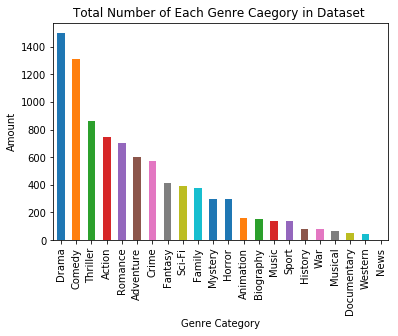

In [25]:
major_counts= mmdf['genres'].value_counts()
major_counts.plot.bar()
plt.xlabel('Genre Category')
plt.ylabel('Amount')
plt.title('Total Number of Each Genre Caegory in Dataset ')

THe function 'describe' was used below to each data frame we created. This function ouputs a summary of the data frame being called. It ouputs the: count, average, standard deviation, minimumm value, maximum value, and quantiles. Without using visualizations, this function allows us to see the distribution of our data set. We will display only the fist output and would leave the rest for others to use. 

In [30]:
desc_drama = mmdf_drama.describe()
desc_comedy = mmdf_comedy.describe()
desc_thriller = mmdf_thriller.describe()
desc_action = mmdf_action.describe()
desc_romance = mmdf_romance.describe()
desc_adventure = mmdf_adventure.describe()
desc_crime = mmdf_crime.describe()
desc_fantasy = mmdf_fantasy.describe()
desc_scifi = mmdf_scifi.describe()
desc_family = mmdf_family.describe()
desc_mystery = mmdf_mystery.describe()
desc_horror = mmdf_horror.describe()
desc_animation = mmdf_animation.describe()
desc_biography = mmdf_biography.describe()
desc_music = mmdf_music.describe()
desc_sport = mmdf_sport.describe()
desc_history = mmdf_history.describe()
desc_war = mmdf_war.describe()
desc_musical = mmdf_musical.describe()
desc_documentary = mmdf_documentary.describe()
desc_western = mmdf_western.describe()
desc_news = mmdf_news.describe()
desc_drama



,title_year,duration,gross,imdb_score
count,1499.000000,1499.000000,1.499000e+03,1499.000000
mean,2004.140093,114.159440,4.073300e+07,6.665310
std,7.113076,22.230899,5.528111e+07,0.886283
min,1984.000000,73.000000,7.030000e+02,2.100000
25%,1999.000000,100.000000,5.566150e+06,6.100000
50%,2005.000000,110.000000,2.410359e+07,6.700000
75%,2010.000000,123.000000,5.291136e+07,7.300000
max,2016.000000,330.000000,6.586723e+08,9.300000


Being able to determine whether there are outliers can be a hard task to do with only a table. A scatter plot matrix allows us to visually see the distribution of our data. A scatter plot matrix ouputs a histogram for each each of our variables and shows a scatter plot between different combinations of each variable. I will call the function on every data frame we created for each genre and will only show the first output (drama). The rest will be available for users to see by uncommenting the function.

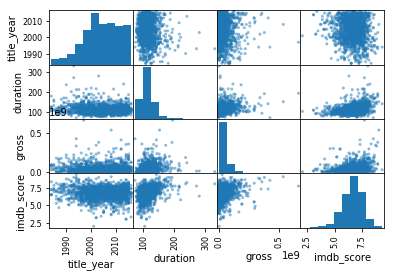

In [36]:
fig_drama=pd.plotting.scatter_matrix(mmdf_drama)
#fig_comedy=pd.plotting.scatter_matrix(mmdf_comedy)
#fig_thriller=pd.plotting.scatter_matrix(mmdf_thriller)
#fig_action=pd.plotting.scatter_matrix(mmdf_action)
#fig_romance=pd.plotting.scatter_matrix(mmdf_romance)
#fig_adventure=pd.plotting.scatter_matrix(mmdf_adventure)
#fig_fantasy=pd.plotting.scatter_matrix(mmdf_fantasy)
#fig_mystery=pd.plotting.scatter_matrix(mmdf_mystery)
#fig_horror=pd.plotting.scatter_matrix(mmdf_horror)
#fig_animation=pd.plotting.scatter_matrix(mmdf_animation)
#fig_biography=pd.plotting.scatter_matrix(mmdf_biography)
#fig_music=pd.plotting.scatter_matrix(mmdf_music)
#fig_sport=pd.plotting.scatter_matrix(mmdf_sport)
#fig_history=pd.plotting.scatter_matrix(mmdf_history)
#fig_war=pd.plotting.scatter_matrix(mmdf_war)
#fig_musical=pd.plotting.scatter_matrix(mmdf_musical)
#fig_documentary=pd.plotting.scatter_matrix(mmdf_documentary)
#fig_western=pd.plotting.scatter_matrix(mmdf_western)
#fig_news=pd.plotting.scatter_matrix(mmdf_news)




# Data Analysis - Analysis & Results

### Title

In [62]:
#todo

Correlations:

Avg imdb score for each year vs US GDP + Median per year

Avg score for INDIVIDUAL GENRES vs US GDP + Median per year



***

# Ethical Considerations, Privacy, and Other Key Points

Data Collection  
The data being collected involves the income of individuals in America as well as public information about films’ performance in the public eye. There is no abuse of consent regarding the income data collected was via a survey of the US Census Bureau. Given that the information was collected via surveying, the data may have biases based on voluntary input and location which we hope to dispel by choosing a wide yet focused group of individuals with which we hope to answer our question.

Data Storage  
Most of the data we gathered so far all come from the site called Kaggle, which is built for people to do their data science projects. It fits our purpose perfectly. The movie dataset we found has information about 1000 movies. Most of the movies are from the year 2014 and after,  but from the year 2007 and later, each year has data of at least 51 movies, which we think is enough for our analysis. Our household income data all come directly or indirectly from the US Census Bureau, and they cover the year range of the movie data we get. The data we will use throughout the development of this project has been publicly collected data so we are not concerned with security issues such as disclosing private information nor are we planning to obscure any data after reaching our conclusions.

Analysis  
As already mentioned, the census data we have found may introduce bias into our exploratory analysis. We hope to avoid reaching incomplete conclusions by sampling from varied information (ex: different locations, income, ethnicities, etc ) from the large dataset.
Luckily, the current datasets that we have found appear to have no missing data so that shouldn’t manifest any misrepresentation issues. However, if we find datasets with missing data then we will undoubtedly clean up the dataset and scrape off the properties with missing values so as to have a (mostly) complete set to work with.
Using these strategies, we hope to produce a complete and honest answer to our question(s).

Other Key Points   
     # Is it a well-posed question?    
It is generally a well-posed question because we are looking at data over time. If we are only comparing data from one year, the taste in movies from households with different income might differ only because of their economic status in society. Comparing income change overtime let us focus on the overall economic situation of the US and how it affects people’s preference for movies.

     # Could the information you will gain and/or the tools you are building be co-opted for nefarious purposes?  
The nature of our question does not immediately invite the possibility of misuse of our data and our potential conclusions. In the case that we find a positive correlation between income and film ratings, the only real “nefarious” use of our conclusion(s) would be to use the findings to plan a successful film release which - as far as we know - is very unlikely in our group


# Conclusion and Discussion

TBD